# 18 - Type I and Type II Errors

**Type I and Type II Errors:** Two ways our statistical decisions can go wrong.

**Type I Error (False Positive):**
- Think something is happening when it's not
- Reject the null hypothesis when it's actually true
- Probability = α (significance level, typically 0.05)

**Type II Error (False Negative):**
- Miss something real that's actually happening
- Fail to reject the null hypothesis when it's actually false
- Probability = β

**Statistical Power:**
- Power = 1 - β
- Ability to detect a real effect when it exists

**Why it matters:** Every decision system must balance these two error types based on costs and consequences.

## Simple Example: Fire Alarm

**Type I Error:** Alarm goes off when there's no fire (false alarm)  
**Type II Error:** Alarm stays silent when house is on fire (missed detection)

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_61491/1435588714.py:85: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


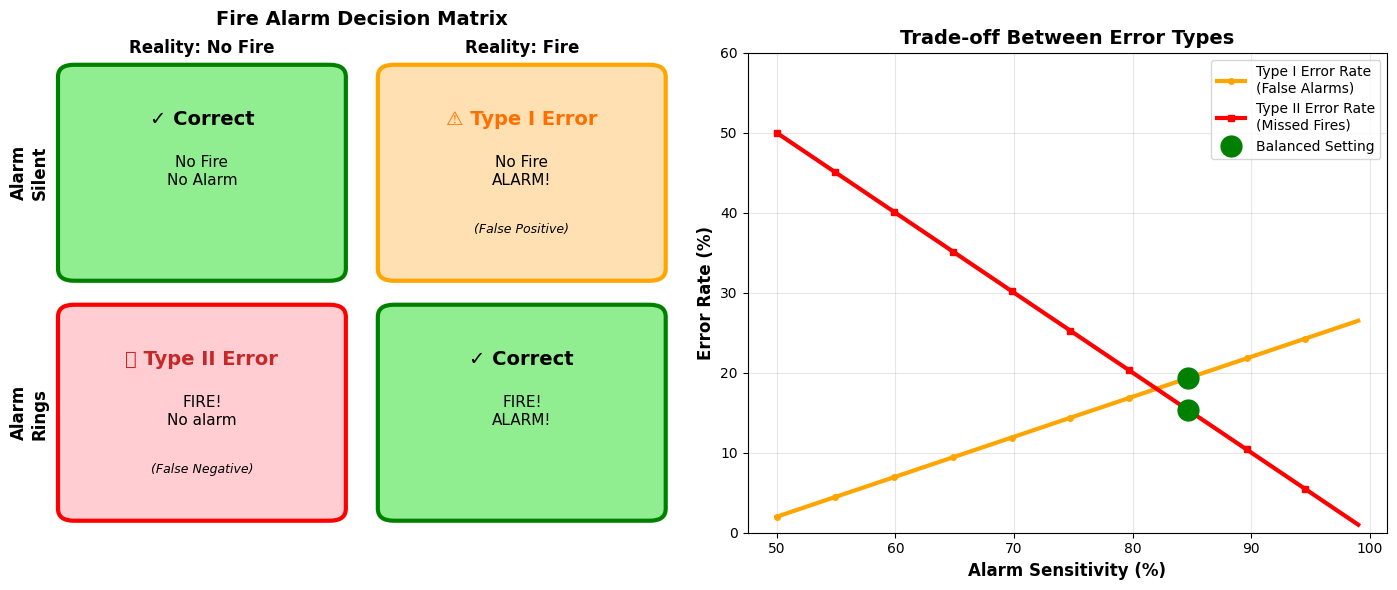


🔥 Fire Alarm Error Analysis:

Type I Error (False Positive):
   → Alarm rings when there's NO fire
   → Consequence: Unnecessary evacuation, lost time, crying wolf
   → Cost: Low to moderate

Type II Error (False Negative):
   → Alarm stays SILENT when there IS a fire
   → Consequence: People stay in burning building
   → Cost: VERY HIGH (life-threatening)

⚖️ The Trade-off:
   → More sensitive alarm = catches all fires BUT more false alarms
   → Less sensitive alarm = fewer false alarms BUT might miss real fires
   → For fire safety: Better to have false alarms than miss a real fire!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch

# Create 2x2 confusion matrix visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Confusion Matrix
ax1 = axes[0]
ax1.set_xlim(0, 2)
ax1.set_ylim(0, 2)
ax1.axis('off')

# Draw boxes
# Top-left: Correct rejection (no fire, no alarm)
rect1 = FancyBboxPatch((0.1, 1.1), 0.8, 0.8, 
                        boxstyle="round,pad=0.05", 
                        edgecolor='green', facecolor='lightgreen', linewidth=3)
ax1.add_patch(rect1)
ax1.text(0.5, 1.7, '✓ Correct', ha='center', fontsize=14, fontweight='bold')
ax1.text(0.5, 1.45, 'No Fire\nNo Alarm', ha='center', fontsize=11)

# Top-right: Type I Error (no fire, alarm)
rect2 = FancyBboxPatch((1.1, 1.1), 0.8, 0.8,
                        boxstyle="round,pad=0.05",
                        edgecolor='orange', facecolor='#FFE0B2', linewidth=3)
ax1.add_patch(rect2)
ax1.text(1.5, 1.7, '⚠️ Type I Error', ha='center', fontsize=14, fontweight='bold', color='#FF6F00')
ax1.text(1.5, 1.45, 'No Fire\nALARM!', ha='center', fontsize=11)
ax1.text(1.5, 1.25, '(False Positive)', ha='center', fontsize=9, style='italic')

# Bottom-left: Type II Error (fire, no alarm)
rect3 = FancyBboxPatch((0.1, 0.1), 0.8, 0.8,
                        boxstyle="round,pad=0.05",
                        edgecolor='red', facecolor='#FFCDD2', linewidth=3)
ax1.add_patch(rect3)
ax1.text(0.5, 0.7, '🚨 Type II Error', ha='center', fontsize=14, fontweight='bold', color='#C62828')
ax1.text(0.5, 0.45, 'FIRE!\nNo alarm', ha='center', fontsize=11)
ax1.text(0.5, 0.25, '(False Negative)', ha='center', fontsize=9, style='italic')

# Bottom-right: Correct detection (fire, alarm)
rect4 = FancyBboxPatch((1.1, 0.1), 0.8, 0.8,
                        boxstyle="round,pad=0.05",
                        edgecolor='green', facecolor='lightgreen', linewidth=3)
ax1.add_patch(rect4)
ax1.text(1.5, 0.7, '✓ Correct', ha='center', fontsize=14, fontweight='bold')
ax1.text(1.5, 0.45, 'FIRE!\nALARM!', ha='center', fontsize=11)

# Labels
ax1.text(0.5, 2.0, 'Reality: No Fire', ha='center', fontsize=12, fontweight='bold')
ax1.text(1.5, 2.0, 'Reality: Fire', ha='center', fontsize=12, fontweight='bold')
ax1.text(-0.1, 1.5, 'Alarm\nSilent', va='center', fontsize=12, fontweight='bold', rotation=90)
ax1.text(-0.1, 0.5, 'Alarm\nRings', va='center', fontsize=12, fontweight='bold', rotation=90)

ax1.set_title('Fire Alarm Decision Matrix', fontsize=14, fontweight='bold', pad=20)

# Right: Trade-off visualization
ax2 = axes[1]

# Simulate scenarios
sensitivities = np.linspace(0.5, 0.99, 100)
# As sensitivity increases (catch more fires), false alarms increase
type_I_rates = 0.02 + (sensitivities - 0.5) * 0.5  # False alarm rate
type_II_rates = 1 - sensitivities  # Miss rate

ax2.plot(sensitivities * 100, type_I_rates * 100, 'orange', linewidth=3, 
         label='Type I Error Rate\n(False Alarms)', marker='o', markersize=4, markevery=10)
ax2.plot(sensitivities * 100, type_II_rates * 100, 'red', linewidth=3,
         label='Type II Error Rate\n(Missed Fires)', marker='s', markersize=4, markevery=10)

# Mark a balanced point
balanced_idx = 70
ax2.plot(sensitivities[balanced_idx] * 100, type_I_rates[balanced_idx] * 100, 
         'go', markersize=15, label='Balanced Setting')
ax2.plot(sensitivities[balanced_idx] * 100, type_II_rates[balanced_idx] * 100, 'go', markersize=15)

ax2.set_xlabel('Alarm Sensitivity (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Error Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Trade-off Between Error Types', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(alpha=0.3)
ax2.set_ylim(0, 60)

plt.tight_layout()
plt.show()

print("\n🔥 Fire Alarm Error Analysis:\n")
print("Type I Error (False Positive):")
print("   → Alarm rings when there's NO fire")
print("   → Consequence: Unnecessary evacuation, lost time, crying wolf")
print("   → Cost: Low to moderate\n")

print("Type II Error (False Negative):")
print("   → Alarm stays SILENT when there IS a fire")
print("   → Consequence: People stay in burning building")
print("   → Cost: VERY HIGH (life-threatening)\n")

print("⚖️ The Trade-off:")
print("   → More sensitive alarm = catches all fires BUT more false alarms")
print("   → Less sensitive alarm = fewer false alarms BUT might miss real fires")
print("   → For fire safety: Better to have false alarms than miss a real fire!")

## Real-World Example: Fraud Detection System

**Business Context:** Credit card company detecting fraudulent transactions

**Type I Error:** Flag a normal purchase as fraud (customer inconvenience)  
**Type II Error:** Miss actual fraud (financial loss)

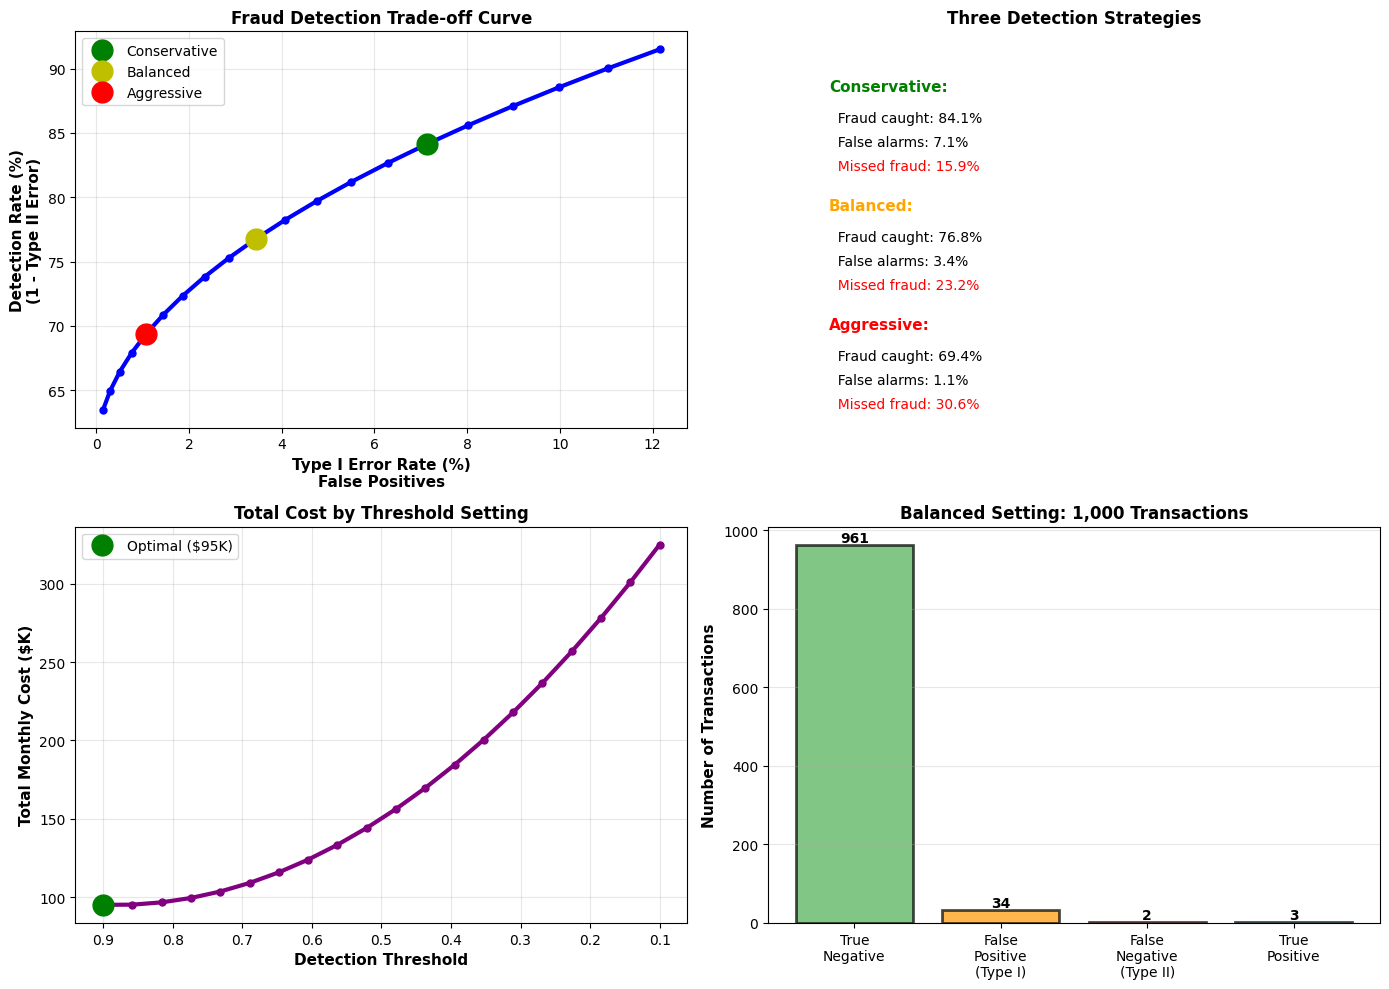


💳 Fraud Detection Error Analysis:

Type I Error (False Positive):
   → System flags a NORMAL purchase as fraud
   → Consequence: Customer can't complete purchase, frustrated customer
   → Cost: ~$25 per incident (service call + card reissue)

Type II Error (False Negative):
   → System MISSES actual fraud
   → Consequence: Fraudulent charge goes through, financial loss
   → Cost: ~$500 per incident (average fraud amount)

🎯 Optimal Strategy:

Best threshold: 0.90
Total monthly cost: $95K
   → Type I errors: 0.1% of normal transactions
   → Type II errors: 36.5% of fraud missed

💡 Business Decision:
   → Can't eliminate both error types
   → Must choose based on relative costs
   → In fraud: Missing fraud costs more than false alarms
   → So we tolerate some false alarms to catch more fraud


In [2]:
# Simulate fraud detection scenarios
np.random.seed(42)

# Different threshold settings
thresholds = np.linspace(0.1, 0.9, 20)

# Simulate detection rates based on threshold
# Lower threshold = more aggressive = catch more fraud but more false positives
true_positive_rates = 0.6 + (1 - thresholds) * 0.35  # Fraud caught
false_positive_rates = (1 - thresholds) ** 2 * 0.15  # Normal flagged as fraud

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. ROC-like curve showing trade-off
ax1 = axes[0, 0]
ax1.plot(false_positive_rates * 100, true_positive_rates * 100, 
         'b-', linewidth=3, marker='o', markersize=5)

# Mark three specific operating points
conservative_idx = 5  # High threshold, fewer false alarms
balanced_idx = 10     # Middle ground
aggressive_idx = 15   # Low threshold, catch more fraud

ax1.plot(false_positive_rates[conservative_idx] * 100, true_positive_rates[conservative_idx] * 100,
         'go', markersize=15, label='Conservative')
ax1.plot(false_positive_rates[balanced_idx] * 100, true_positive_rates[balanced_idx] * 100,
         'yo', markersize=15, label='Balanced')
ax1.plot(false_positive_rates[aggressive_idx] * 100, true_positive_rates[aggressive_idx] * 100,
         'ro', markersize=15, label='Aggressive')

ax1.set_xlabel('Type I Error Rate (%)\nFalse Positives', fontsize=11, fontweight='bold')
ax1.set_ylabel('Detection Rate (%)\n(1 - Type II Error)', fontsize=11, fontweight='bold')
ax1.set_title('Fraud Detection Trade-off Curve', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)

# 2. Confusion matrices for three settings
ax2 = axes[0, 1]
ax2.axis('off')

settings = [
    ('Conservative', conservative_idx, 'green'),
    ('Balanced', balanced_idx, 'orange'),
    ('Aggressive', aggressive_idx, 'red')
]

y_position = 0.85
for name, idx, color in settings:
    tpr = true_positive_rates[idx]
    fpr = false_positive_rates[idx]
    
    ax2.text(0.1, y_position, f'{name}:', fontsize=11, fontweight='bold', color=color)
    ax2.text(0.1, y_position - 0.08, f'  Fraud caught: {tpr*100:.1f}%', fontsize=10)
    ax2.text(0.1, y_position - 0.14, f'  False alarms: {fpr*100:.1f}%', fontsize=10)
    ax2.text(0.1, y_position - 0.20, f'  Missed fraud: {(1-tpr)*100:.1f}%', fontsize=10, color='red')
    
    y_position -= 0.3

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_title('Three Detection Strategies', fontsize=12, fontweight='bold')

# 3. Cost analysis
ax3 = axes[1, 0]

# Assume costs
cost_per_false_positive = 25      # Customer service call, card reissue
cost_per_false_negative = 500     # Average fraud loss
num_normal_transactions = 100000  # Per month
num_fraud_transactions = 500      # Per month (0.5% fraud rate)

costs = []
for tpr, fpr in zip(true_positive_rates, false_positive_rates):
    false_positive_cost = fpr * num_normal_transactions * cost_per_false_positive
    false_negative_cost = (1 - tpr) * num_fraud_transactions * cost_per_false_negative
    total_cost = false_positive_cost + false_negative_cost
    costs.append(total_cost / 1000)  # Convert to thousands

ax3.plot(thresholds, costs, 'purple', linewidth=3, marker='o', markersize=5)
min_cost_idx = np.argmin(costs)
ax3.plot(thresholds[min_cost_idx], costs[min_cost_idx], 
         'go', markersize=15, label=f'Optimal (${costs[min_cost_idx]:.0f}K)')

ax3.set_xlabel('Detection Threshold', fontsize=11, fontweight='bold')
ax3.set_ylabel('Total Monthly Cost ($K)', fontsize=11, fontweight='bold')
ax3.set_title('Total Cost by Threshold Setting', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(alpha=0.3)
ax3.invert_xaxis()  # Lower threshold = more aggressive

# 4. Example outcomes simulation
ax4 = axes[1, 1]

# Simulate 1000 transactions for balanced setting
n_transactions = 1000
fraud_rate = 0.005
n_fraud = int(n_transactions * fraud_rate)
n_normal = n_transactions - n_fraud

idx = balanced_idx
tpr = true_positive_rates[idx]
fpr = false_positive_rates[idx]

# Calculate outcomes
true_positives = int(n_fraud * tpr)
false_negatives = n_fraud - true_positives
false_positives = int(n_normal * fpr)
true_negatives = n_normal - false_positives

categories = ['True\nNegative', 'False\nPositive\n(Type I)', 
              'False\nNegative\n(Type II)', 'True\nPositive']
values = [true_negatives, false_positives, false_negatives, true_positives]
colors_bars = ['#4CAF50', '#FF9800', '#F44336', '#2196F3']

bars = ax4.bar(range(len(categories)), values, color=colors_bars, alpha=0.7, edgecolor='black', linewidth=2)
ax4.set_xticks(range(len(categories)))
ax4.set_xticklabels(categories, fontsize=10)
ax4.set_ylabel('Number of Transactions', fontsize=11, fontweight='bold')
ax4.set_title(f'Balanced Setting: {n_transactions:,} Transactions', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add values on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("\n💳 Fraud Detection Error Analysis:\n")
print("Type I Error (False Positive):")
print("   → System flags a NORMAL purchase as fraud")
print("   → Consequence: Customer can't complete purchase, frustrated customer")
print(f"   → Cost: ~${cost_per_false_positive} per incident (service call + card reissue)\n")

print("Type II Error (False Negative):")
print("   → System MISSES actual fraud")
print("   → Consequence: Fraudulent charge goes through, financial loss")
print(f"   → Cost: ~${cost_per_false_negative} per incident (average fraud amount)\n")

print("🎯 Optimal Strategy:\n")
print(f"Best threshold: {thresholds[min_cost_idx]:.2f}")
print(f"Total monthly cost: ${costs[min_cost_idx]:.0f}K")
print(f"   → Type I errors: {false_positive_rates[min_cost_idx]*100:.1f}% of normal transactions")
print(f"   → Type II errors: {(1-true_positive_rates[min_cost_idx])*100:.1f}% of fraud missed")

print("\n💡 Business Decision:")
print("   → Can't eliminate both error types")
print("   → Must choose based on relative costs")
print("   → In fraud: Missing fraud costs more than false alarms")
print("   → So we tolerate some false alarms to catch more fraud")

## Summary: Type I and Type II Errors

### The Two Types of Errors

| Error Type | Also Called | What It Means | Fire Alarm Example | Fraud Example |
|------------|-------------|---------------|-------------------|---------------|
| **Type I** | False Positive | Say "yes" when should say "no" | Alarm with no fire | Block normal purchase |
| **Type II** | False Negative | Say "no" when should say "yes" | No alarm during fire | Miss actual fraud |

### Key Relationships
- **Type I Error Rate = α (alpha)** = Significance level (often 0.05)
- **Type II Error Rate = β (beta)**
- **Statistical Power = 1 - β** = Ability to detect real effects

### The Fundamental Trade-off
- **Decrease Type I** → Increase Type II (and vice versa)
- Can't eliminate both without:
  - Larger sample size
  - Better measurement/detection
  - Stronger true effect

### Choosing Your Balance

**Prioritize avoiding Type I when:**
- False positives are very expensive
- Example: Medical treatment with severe side effects
- Example: Launching expensive marketing campaign

**Prioritize avoiding Type II when:**
- False negatives are very dangerous/costly
- Example: Fire alarms, medical screening for serious disease
- Example: Fraud detection, security threats

### Real-World Applications
- **Medical Testing:** Balance false alarms vs missed diagnoses
- **Quality Control:** Balance rejecting good products vs shipping bad ones
- **Spam Filters:** Balance blocking good emails vs letting spam through
- **A/B Testing:** Balance false discoveries vs missed opportunities
- **Credit Approval:** Balance approving bad loans vs rejecting good customers

**Remember:** Every decision system involves this trade-off. The key is understanding the costs of each error type and optimizing accordingly!